# Week 1 class

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

Text(0, 0.5, 'Time (s)')

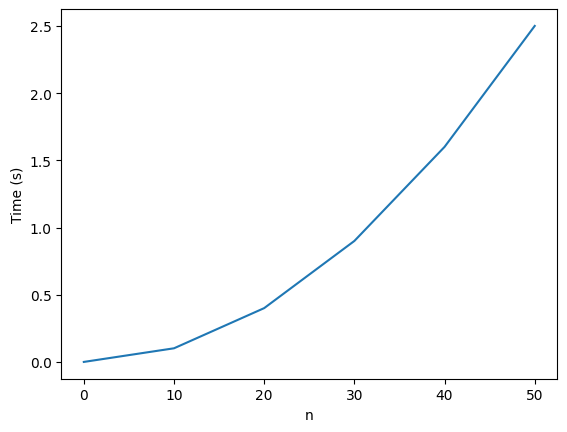

In [4]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)
    
def timeit(func, n):
    start = time.time()
    func(n)  # Call the passed function with 'n'
    end = time.time()
    return end - start
    
N = [0, 10, 20, 30, 40, 50]
T = [timeit(fake_function, n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')

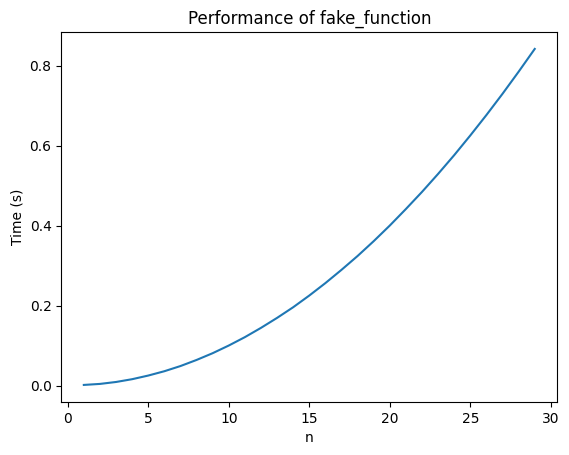

In [35]:
def assess(func, N):
    # Measure the time taken for each value in N
    n = [n for n in range(1,N) ]
    T = [timeit(func, x) for x in n]
    
    plt.plot(n, T)
    plt.xlabel('n')
    plt.ylabel('Time (s)')
    plt.title(f"Performance of {func.__name__}")
    # Plotting

    plt.show()

# Test
N = 30
assess(fake_function, N)

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```

## Method 1: Recurrent Function

In [36]:
def fb(n):
    if n < 1:
        return False
    if n <= 2:
        return 1
    else:
        return fb(n-1) + fb(n-2)

#test 
print(fb(0))
print(fb(3))
print(fb(6))

False
2
8


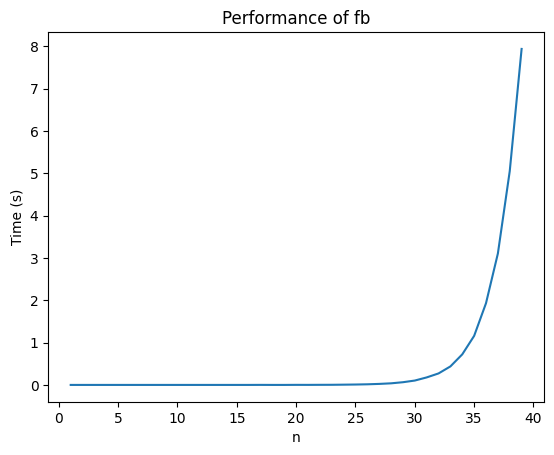

In [37]:
N =  40
assess(fb, N)

## Dynamic Programming

In [38]:
look_up = {1:1, 2:1}
def fb_dp(n):
    if n in look_up:
        return look_up[n]
    else:
        ans = fb_dp(n - 1) + fb_dp(n - 2)
        look_up[n] = ans
        return ans

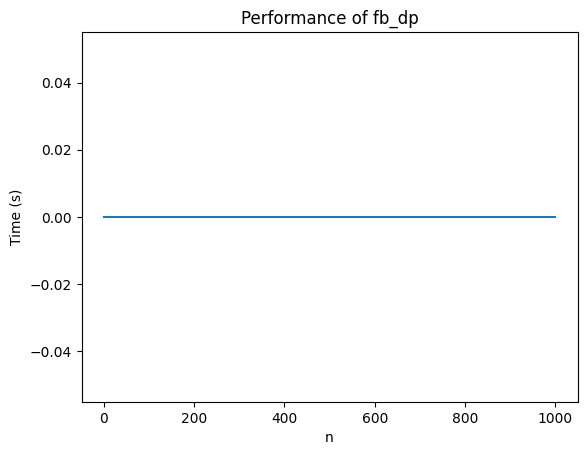

In [49]:
N =  1000
look_up = {1:1, 2:1}
assess(fb_dp, N)

## Inprove Storage

In [40]:
def F(n):
    a = b = 1
    for _ in range(3, n):
        a, b = b, a+b

    return b
        

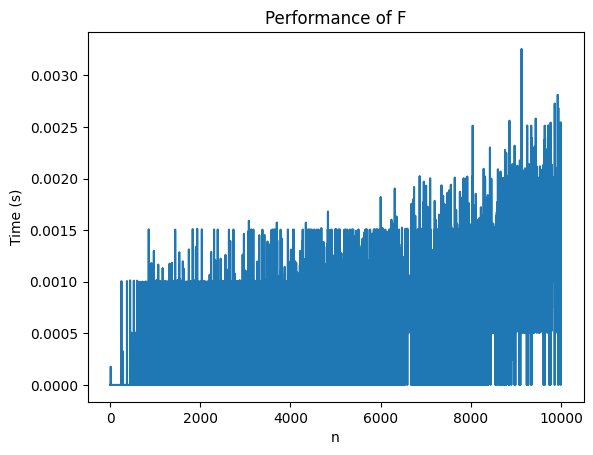

In [50]:
N =  10000
assess(F, N)

In [4]:
for i in range(40,1000):
    if i * 0.678 >= 33:
        print(i)
        break

49
